#1. Dataset Selection and Initial Analysis:



 IRIS DATASET ANALYSIS 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000 

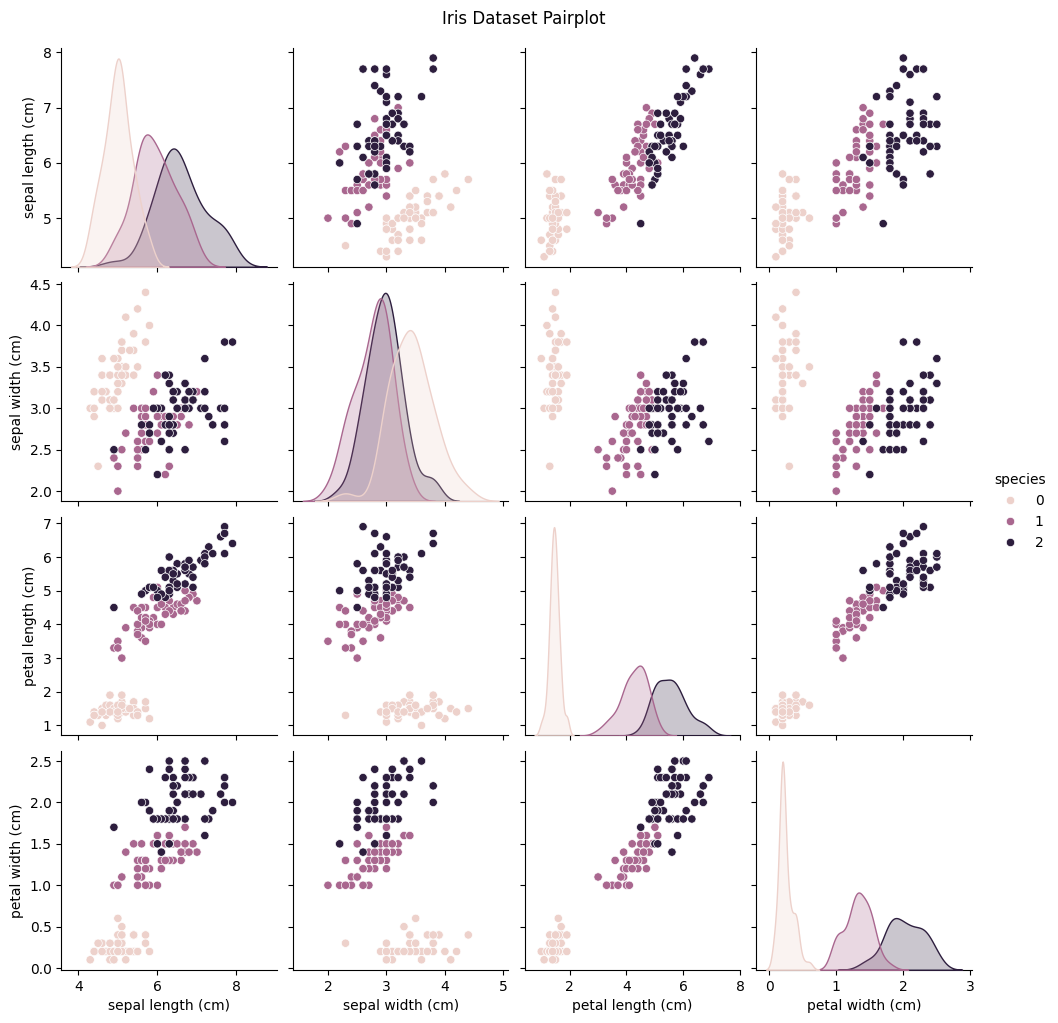

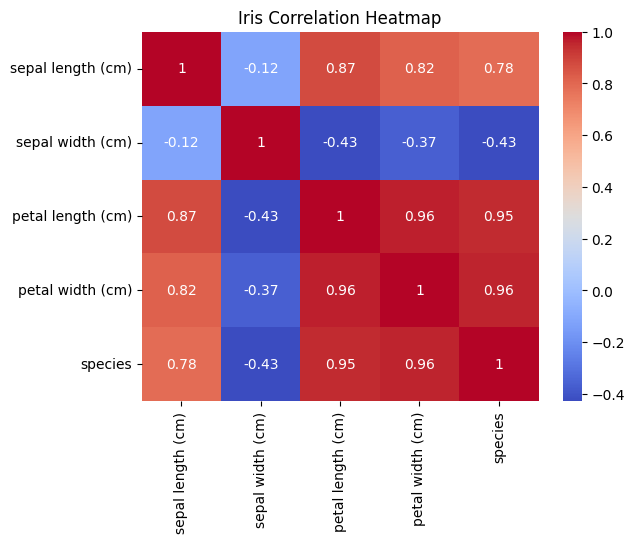

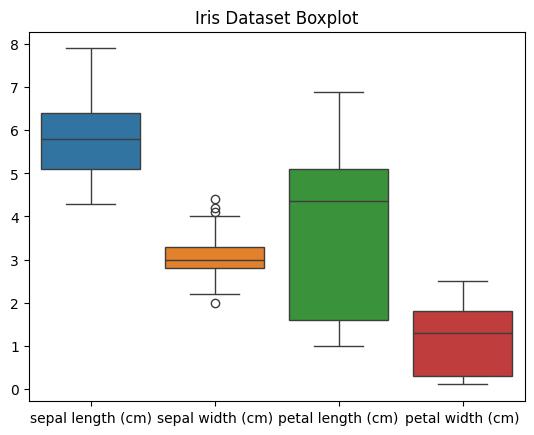


 WHOLESALE CUSTOMERS DATASET ANALYSIS 


100%|██████████| 6.85k/6.85k [00:00<00:00, 11.8MB/s]

Extracting files...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25

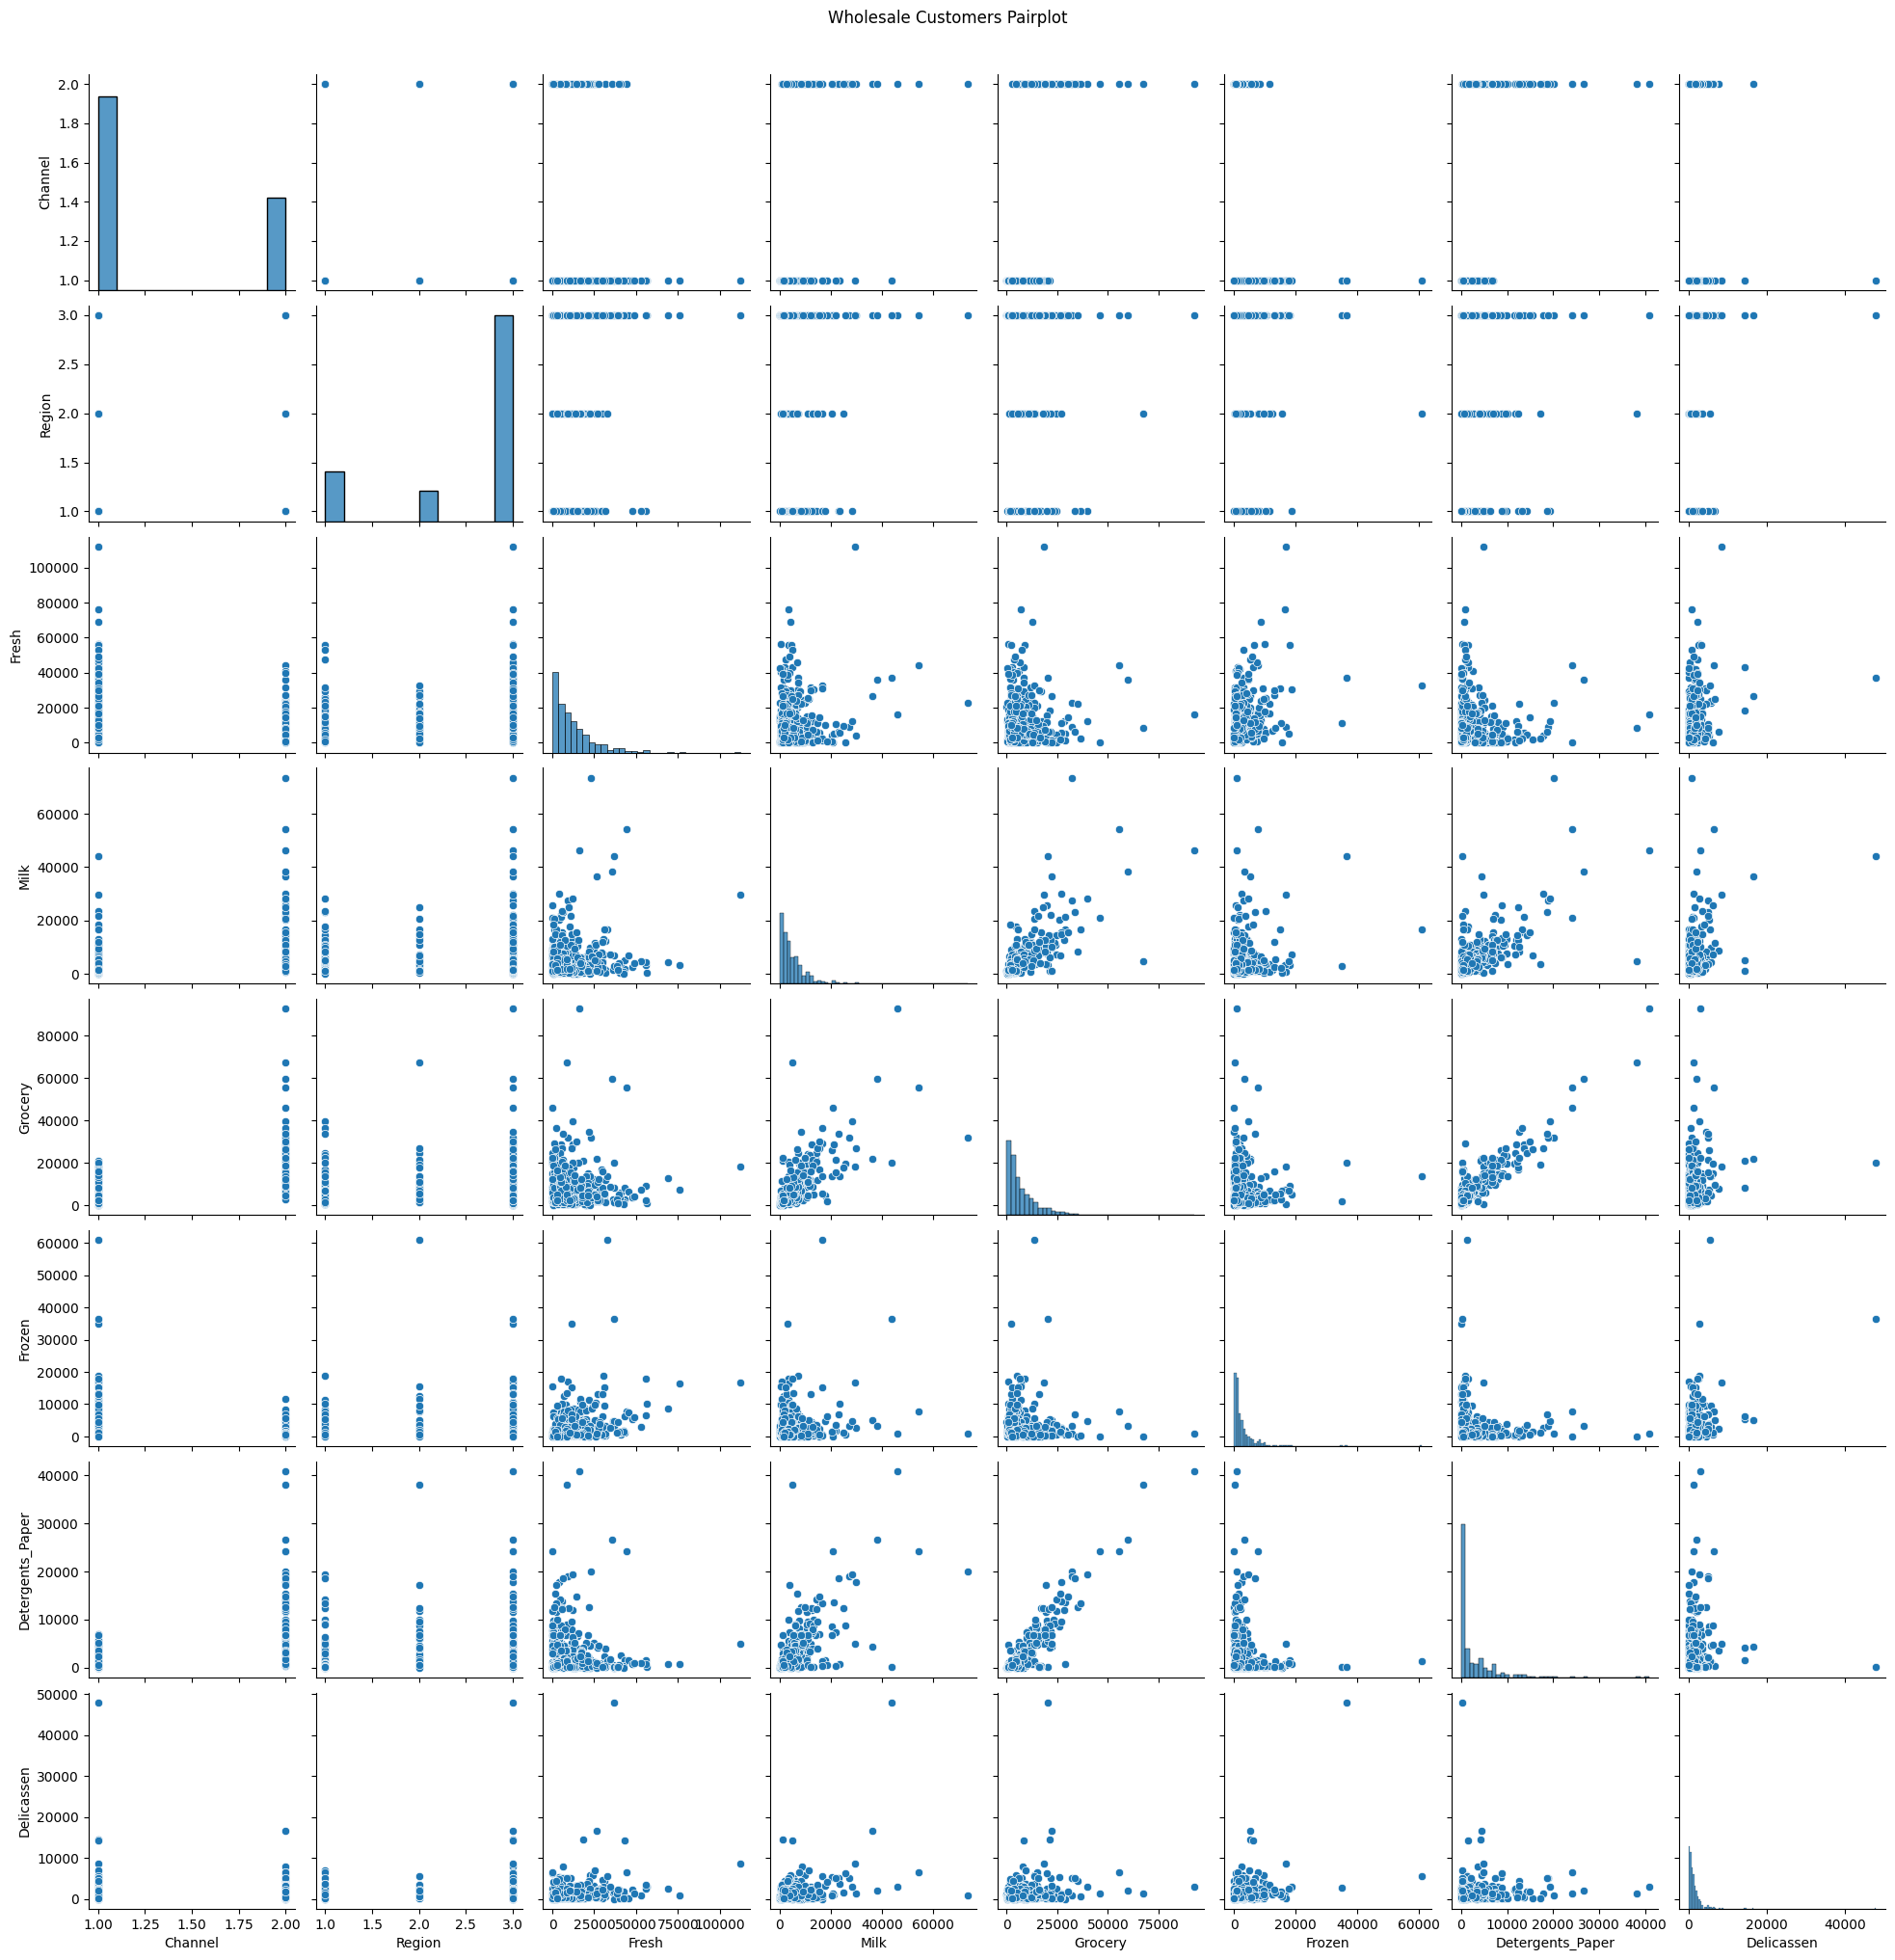

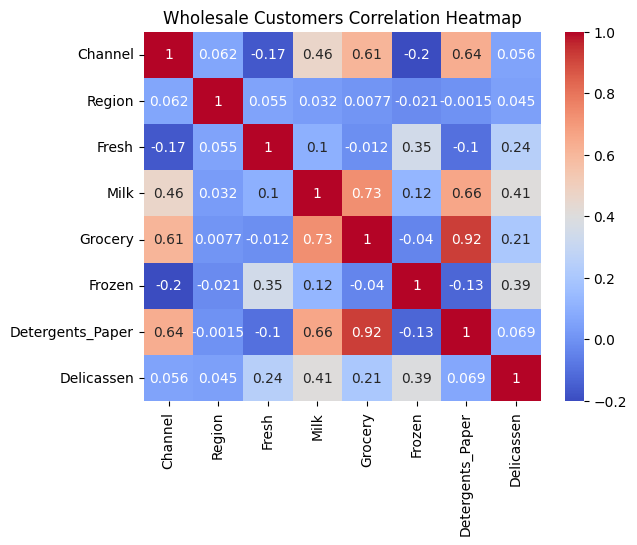

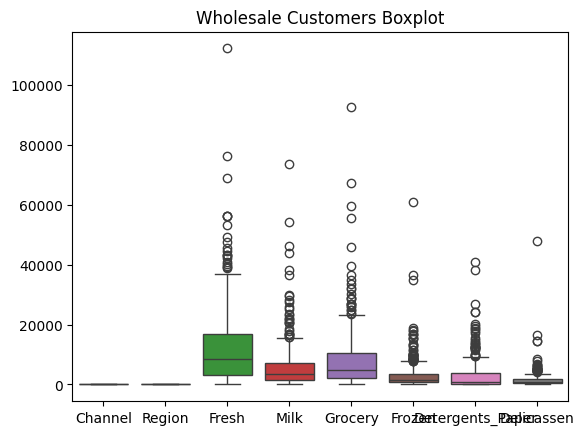

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import kagglehub

# Iris Dataset Analysis
print("\n IRIS DATASET ANALYSIS ")
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
print(df_iris.info())
print(df_iris.describe())
print(df_iris.corr())
sns.pairplot(df_iris, hue='species', diag_kind='kde')
plt.suptitle("Iris Dataset Pairplot", y=1.02)
plt.show()
sns.heatmap(df_iris.corr(), annot=True, cmap='coolwarm')
plt.title("Iris Correlation Heatmap")
plt.show()
sns.boxplot(data=df_iris.drop(columns='species'))
plt.title("Iris Dataset Boxplot")
plt.show()

# Wholesale Customers Dataset Analysis
print("\n WHOLESALE CUSTOMERS DATASET ANALYSIS ")
path = kagglehub.dataset_download("binovi/wholesale-customers-data-set")
df_wholesale = pd.read_csv(f"{path}/Wholesale customers data.csv")
print(df_wholesale.info())
print(df_wholesale.describe())
print(df_wholesale.corr())
sns.pairplot(df_wholesale)
plt.suptitle("Wholesale Customers Pairplot", y=1.02)
plt.show()
sns.heatmap(df_wholesale.corr(), annot=True, cmap='coolwarm')
plt.title("Wholesale Customers Correlation Heatmap")
plt.show()
sns.boxplot(data=df_wholesale)
plt.title("Wholesale Customers Boxplot")
plt.show()




#2. Implementing Clustering Algorithms:


=== K-MEANS CLUSTERING: Iris ===


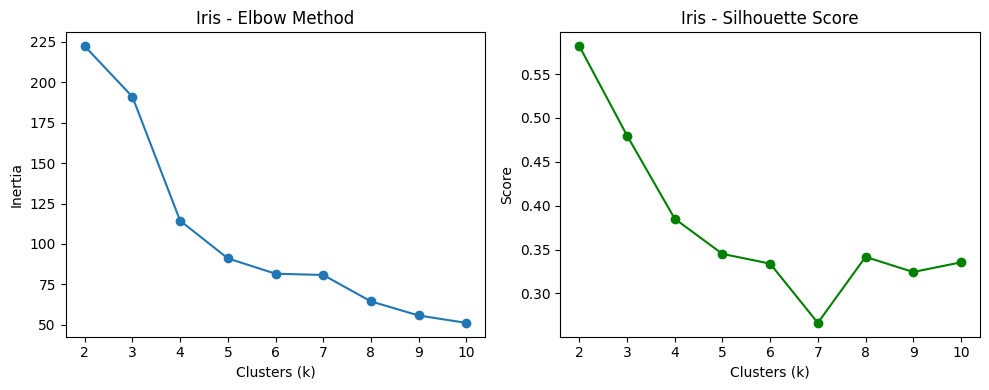


=== K-MEANS CLUSTERING: Wholesale Customers ===


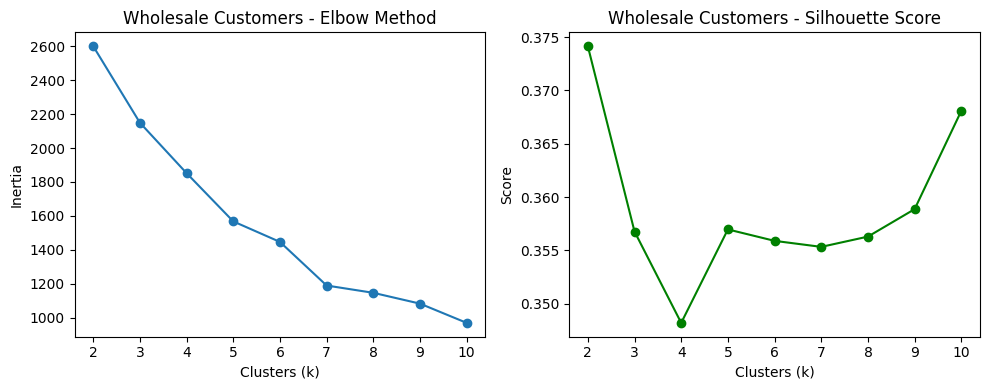


=== HIERARCHICAL CLUSTERING: Iris (ward) ===


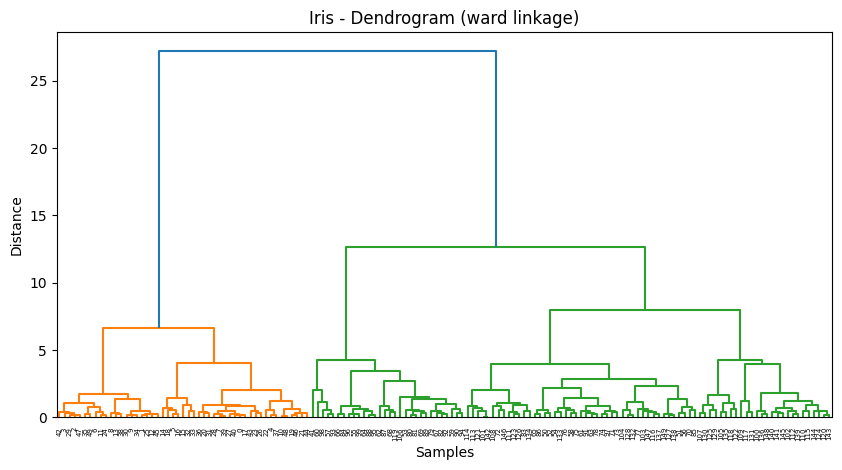

Iris - Example Cluster Labels (first 10): [1 1 1 1 1 1 1 1 1 1]

=== HIERARCHICAL CLUSTERING: Wholesale Customers (ward) ===


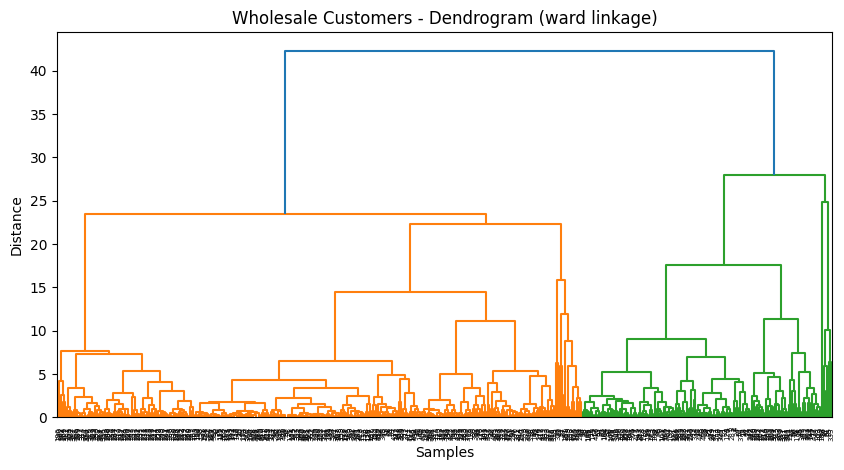

Wholesale Customers - Example Cluster Labels (first 10): [2 2 2 1 2 2 2 2 1 2]

=== Clustering Analysis Completed Successfully ===


In [3]:
# ===========================================
# Step 3 & 4: Clustering Analysis
# ===========================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Scale both datasets
df_iris_scaled = StandardScaler().fit_transform(df_iris.drop(columns='species', errors='ignore'))
df_wholesale_scaled = StandardScaler().fit_transform(df_wholesale)

# -----------------------------
# K-MEANS CLUSTERING
# -----------------------------
def kmeans_analysis(data, name):
    print(f"\n=== K-MEANS CLUSTERING: {name} ===")
    inertias, silhouettes = [], []
    K_range = range(2, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(data, labels))
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(K_range, inertias, 'o-')
    plt.title(f"{name} - Elbow Method")
    plt.xlabel('Clusters (k)')
    plt.ylabel('Inertia')
    plt.subplot(1,2,2)
    plt.plot(K_range, silhouettes, 'o-', color='green')
    plt.title(f"{name} - Silhouette Score")
    plt.xlabel('Clusters (k)')
    plt.ylabel('Score')
    plt.tight_layout()
    plt.show()

kmeans_analysis(df_iris_scaled, "Iris")
kmeans_analysis(df_wholesale_scaled, "Wholesale Customers")

# -----------------------------
# HIERARCHICAL CLUSTERING
# -----------------------------
def hierarchical_analysis(data, name, linkage_type='ward'):
    print(f"\n=== HIERARCHICAL CLUSTERING: {name} ({linkage_type}) ===")
    linked = linkage(data, method=linkage_type)
    plt.figure(figsize=(10,5))
    dendrogram(linked)
    plt.title(f"{name} - Dendrogram ({linkage_type} linkage)")
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()
    clusters = fcluster(linked, t=3, criterion='maxclust')
    print(f"{name} - Example Cluster Labels (first 10):", clusters[:10])

hierarchical_analysis(df_iris_scaled, "Iris")
hierarchical_analysis(df_wholesale_scaled, "Wholesale Customers")

print("\n=== Clustering Analysis Completed Successfully ===")


#3. Cluster Visualization and Interpretation:


=== KMeans CLUSTER VISUALIZATION: Iris ===


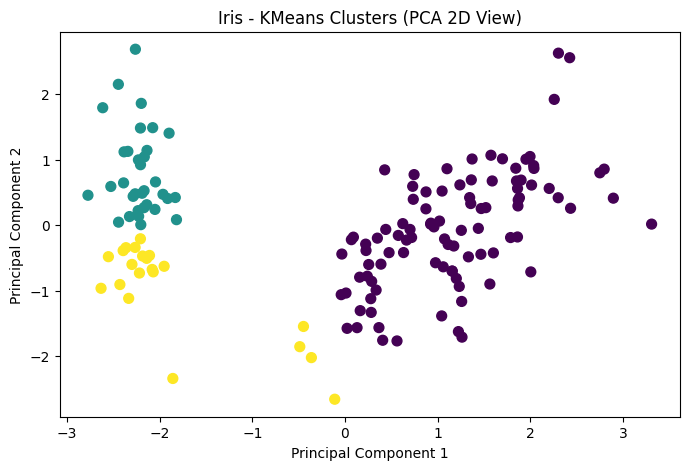

Iris (KMeans) - Silhouette Score: 0.480
Iris (KMeans) - Davies-Bouldin Index: 0.789
------------------------------------------------------------

=== Hierarchical CLUSTER VISUALIZATION: Iris ===


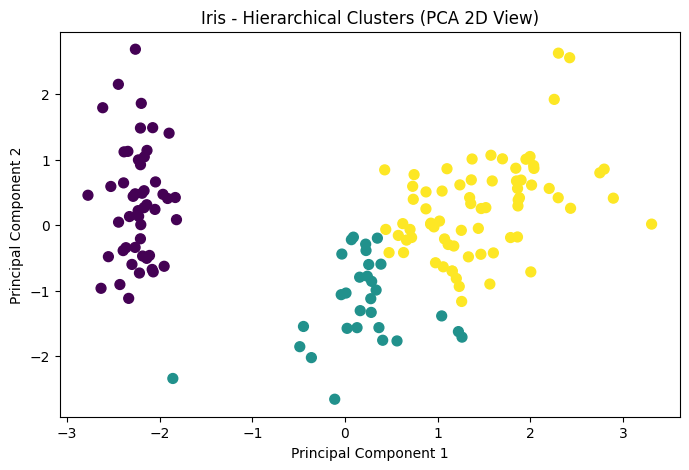

Iris (Hierarchical) - Silhouette Score: 0.447
Iris (Hierarchical) - Davies-Bouldin Index: 0.803
------------------------------------------------------------

=== KMeans CLUSTER VISUALIZATION: Wholesale Customers ===


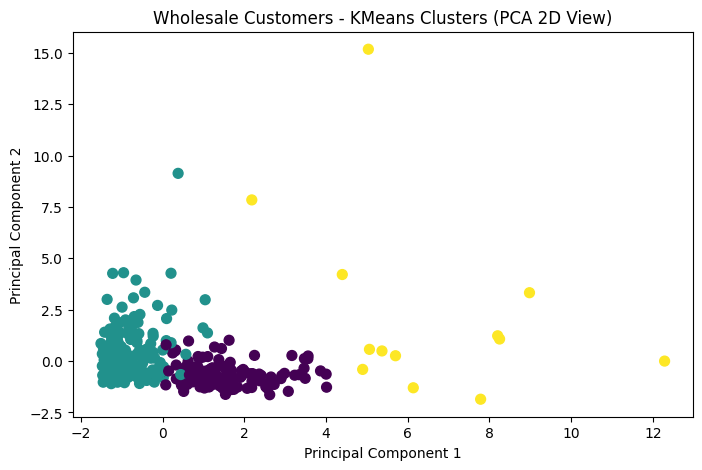

Wholesale Customers (KMeans) - Silhouette Score: 0.357
Wholesale Customers (KMeans) - Davies-Bouldin Index: 1.174
------------------------------------------------------------

=== Hierarchical CLUSTER VISUALIZATION: Wholesale Customers ===


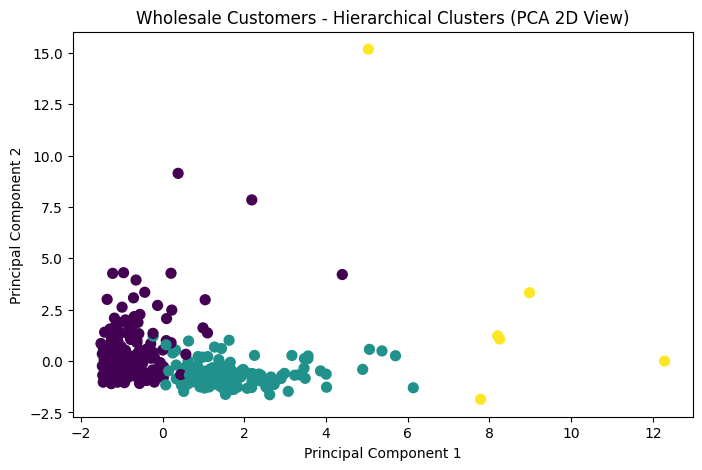

Wholesale Customers (Hierarchical) - Silhouette Score: 0.360
Wholesale Customers (Hierarchical) - Davies-Bouldin Index: 1.155
------------------------------------------------------------

 Cluster Visualization and Interpretation Completed 


In [5]:

from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.manifold import TSNE

def visualize_clusters(data_scaled, name, method="KMeans", n_clusters=3):
    print(f"\n=== {method} CLUSTER VISUALIZATION: {name} ===")

    # Perform clustering
    if method == "KMeans":
        model = KMeans(n_clusters=n_clusters, random_state=42)
        labels = model.fit_predict(data_scaled)
    elif method == "Hierarchical":
        linked = linkage(data_scaled, method='ward')
        labels = fcluster(linked, t=n_clusters, criterion='maxclust')
    else:
        raise ValueError("Method must be 'KMeans' or 'Hierarchical'")

    # Dimensionality Reduction (PCA)
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data_scaled)

    # Visualize clusters
    plt.figure(figsize=(8,5))
    plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap='viridis', s=50)
    plt.title(f"{name} - {method} Clusters (PCA 2D View)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

    # Quantitative Evaluation
    sil_score = silhouette_score(data_scaled, labels)
    db_index = davies_bouldin_score(data_scaled, labels)
    print(f"{name} ({method}) - Silhouette Score: {sil_score:.3f}")
    print(f"{name} ({method}) - Davies-Bouldin Index: {db_index:.3f}")
    print("-" * 60)

# Visualize & Evaluate for both datasets
visualize_clusters(df_iris_scaled, "Iris", method="KMeans", n_clusters=3)
visualize_clusters(df_iris_scaled, "Iris", method="Hierarchical", n_clusters=3)
visualize_clusters(df_wholesale_scaled, "Wholesale Customers", method="KMeans", n_clusters=3)
visualize_clusters(df_wholesale_scaled, "Wholesale Customers", method="Hierarchical", n_clusters=3)




# 4. Exploratory Analysis and Insights:


=== CLUSTER INSIGHTS: Iris ===

Cluster Feature Means:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                     6.31              2.90               4.97   
1                     5.17              3.63               1.49   
2                     4.75              2.90               1.76   

         petal width (cm)  species  
Cluster                             
0                    1.70     1.52  
1                    0.27     0.00  
2                    0.35     0.19  

Cluster Sizes:
Cluster
0    96
1    33
2    21
Name: count, dtype: int64


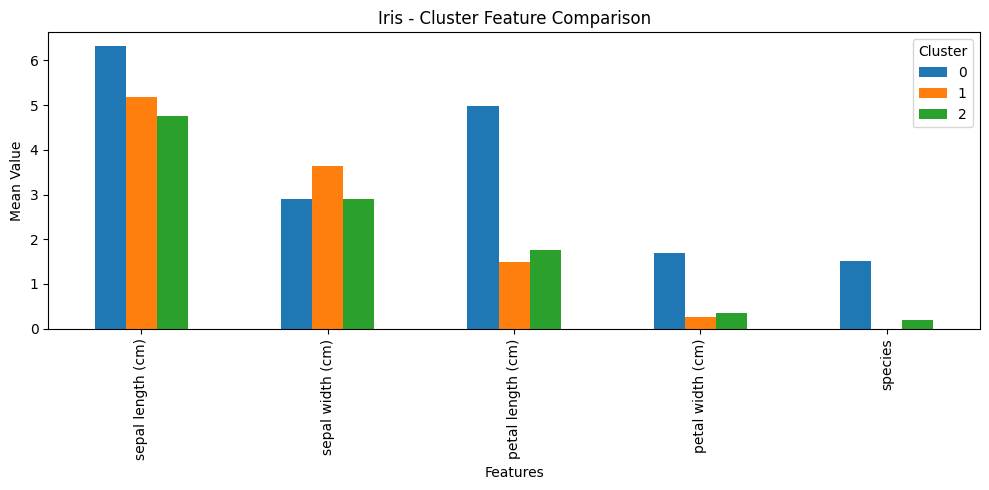


Possible Insights:
- Each cluster likely represents a species (Setosa, Versicolor, Virginica).
- Sepal and petal dimensions separate the clusters clearly.
- Analyze extreme values in the cluster means to identify strong differentiating features.


=== CLUSTER INSIGHTS: Wholesale Customers ===

Cluster Feature Means:
         Channel  Region     Fresh      Milk   Grocery   Frozen  \
Cluster                                                           
0           2.00    2.62   8165.92   8748.52  13905.49  1441.63   
1           1.00    2.51  13075.90   3218.74   3855.70  3620.40   
2           1.85    2.62  25770.77  35160.38  41977.38  6844.54   

         Detergents_Paper  Delicassen  
Cluster                                
0                 5991.15     1535.01  
1                  776.88     1242.25  
2                19867.38     7880.31  

Cluster Sizes:
Cluster
1    297
0    130
2     13
Name: count, dtype: int64


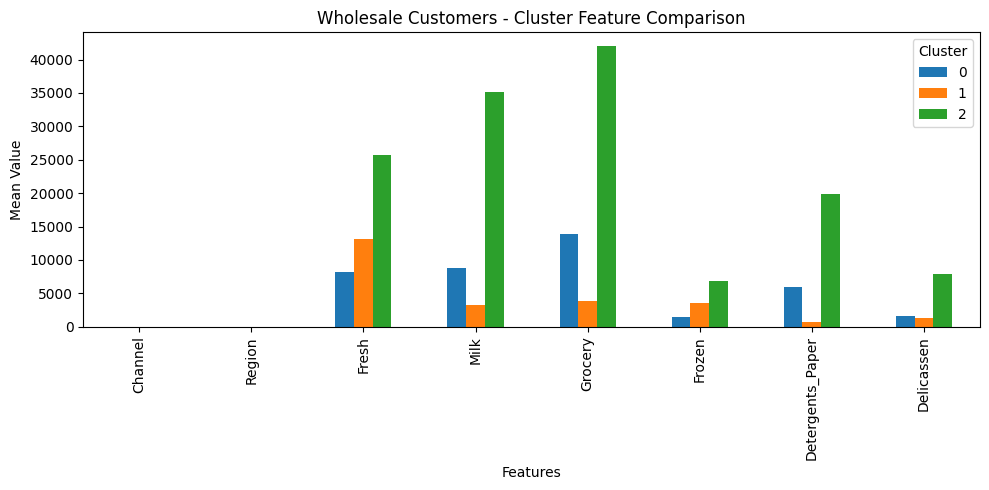


Possible Insights:
- Clusters may represent customer types (e.g., small retailers vs. large hotels).
- Features like 'Grocery' and 'Detergents_Paper' might indicate purchasing power.
- Analyze extreme values in the cluster means to identify strong differentiating features.


=== PARAMETER EXPERIMENTS: Iris ===

-- K-Means Clustering: Varying Number of Clusters --
k=2: Silhouette=0.582, DB Index=0.593
k=3: Silhouette=0.480, DB Index=0.789
k=4: Silhouette=0.385, DB Index=0.870
k=5: Silhouette=0.345, DB Index=0.944

-- Hierarchical Clustering: Different Linkage Methods --
Ward Linkage: Silhouette=0.447, DB Index=0.803
Complete Linkage: Silhouette=0.450, DB Index=0.758
Average Linkage: Silhouette=0.480, DB Index=0.575
Single Linkage: Silhouette=0.505, DB Index=0.493

=== PARAMETER EXPERIMENTS: Wholesale Customers ===

-- K-Means Clustering: Varying Number of Clusters --
k=2: Silhouette=0.374, DB Index=1.281
k=3: Silhouette=0.357, DB Index=1.174
k=4: Silhouette=0.348, DB Index=1.236
k=5: S

In [6]:

import numpy as np

def cluster_insights(data, original_df, name, n_clusters=3):
    print(f"\n=== CLUSTER INSIGHTS: {name} ===")

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # Add cluster labels to the original dataset
    df_clustered = original_df.copy()
    df_clustered['Cluster'] = labels

    # Calculate cluster-wise mean of each feature
    cluster_summary = df_clustered.groupby('Cluster').mean().round(2)
    print("\nCluster Feature Means:")
    print(cluster_summary)

    # Count of samples in each cluster
    print("\nCluster Sizes:")
    print(df_clustered['Cluster'].value_counts())

    # Optional: visualize cluster means
    cluster_summary.T.plot(kind='bar', figsize=(10,5))
    plt.title(f"{name} - Cluster Feature Comparison")
    plt.xlabel("Features")
    plt.ylabel("Mean Value")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

    # Insight summary
    print("\nPossible Insights:")
    if name == "Iris":
        print("- Each cluster likely represents a species (Setosa, Versicolor, Virginica).")
        print("- Sepal and petal dimensions separate the clusters clearly.")
    elif name == "Wholesale Customers":
        print("- Clusters may represent customer types (e.g., small retailers vs. large hotels).")
        print("- Features like 'Grocery' and 'Detergents_Paper' might indicate purchasing power.")
    print("- Analyze extreme values in the cluster means to identify strong differentiating features.\n")

# Apply to both datasets
cluster_insights(df_iris_scaled, df_iris, "Iris", n_clusters=3)
cluster_insights(df_wholesale_scaled, df_wholesale, "Wholesale Customers", n_clusters=3)

# Step 8: Impact of Clustering Parameters


def clustering_parameter_experiments(data_scaled, name):
    print(f"\n=== PARAMETER EXPERIMENTS: {name} ===")

    # ---- K-MEANS (different k values) ----
    print("\n-- K-Means Clustering: Varying Number of Clusters --")
    for k in [2, 3, 4, 5]:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data_scaled)
        sil = silhouette_score(data_scaled, labels)
        db = davies_bouldin_score(data_scaled, labels)
        print(f"k={k}: Silhouette={sil:.3f}, DB Index={db:.3f}")

    # ---- HIERARCHICAL (different linkage criteria) ----
    print("\n-- Hierarchical Clustering: Different Linkage Methods --")
    for link_type in ['ward', 'complete', 'average', 'single']:
        linked = linkage(data_scaled, method=link_type)
        labels = fcluster(linked, t=3, criterion='maxclust')
        sil = silhouette_score(data_scaled, labels)
        db = davies_bouldin_score(data_scaled, labels)
        print(f"{link_type.title()} Linkage: Silhouette={sil:.3f}, DB Index={db:.3f}")

# Run experiments for both datasets
clustering_parameter_experiments(df_iris_scaled, "Iris")
clustering_parameter_experiments(df_wholesale_scaled, "Wholesale Customers")

print("\n=== Exploratory Analysis and Parameter Impact Completed ===")


# 5. Comparison and Reporting:


=== Comparative Evaluation Results ===
               Dataset        Method  Silhouette  Davies-Bouldin
0                 Iris       K-Means       0.480           0.789
1                 Iris  Hierarchical       0.447           0.803
2  Wholesale Customers       K-Means       0.357           1.174
3  Wholesale Customers  Hierarchical       0.360           1.155


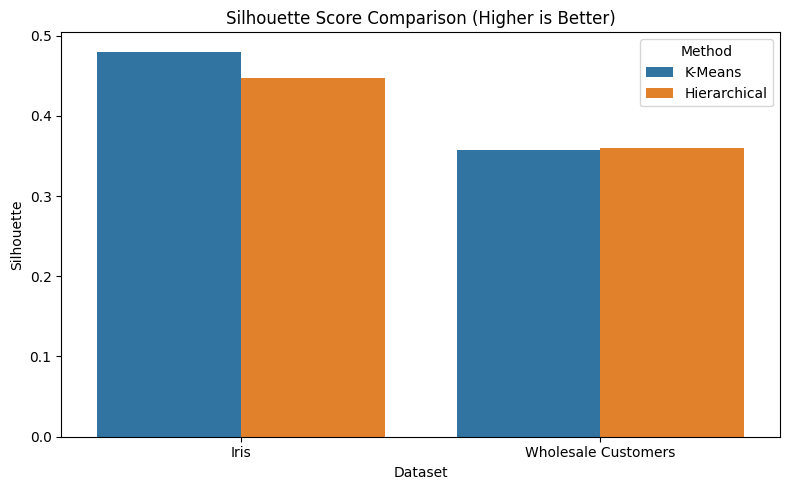

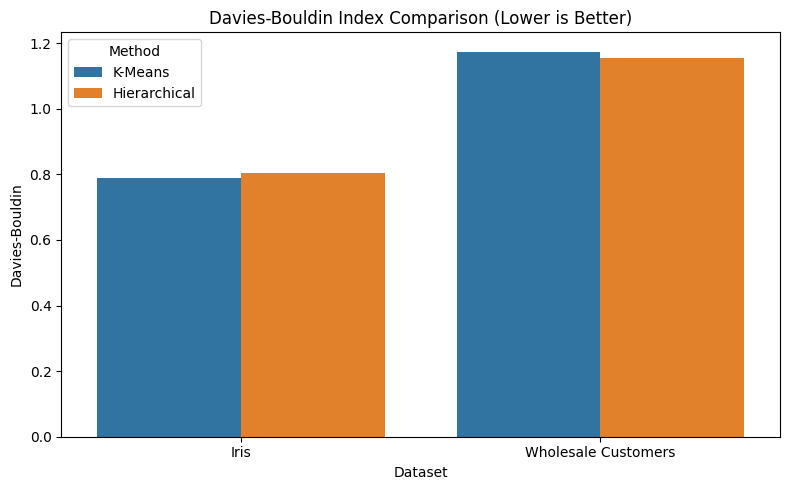


=== Observations ===
For Iris: K-Means achieved better overall clustering performance.
For Wholesale Customers: Hierarchical achieved better overall clustering performance.

Interpretation:
- K-Means tends to perform better on datasets with clear spherical clusters (like Iris).
- Hierarchical clustering is often more suitable for datasets with varying densities and scales (like Wholesale Customers).
- The difference in Silhouette and Davies-Bouldin scores reflects how each algorithm handles feature space and variance.


In [7]:
# ===========================================
# Step 9: Comparative Evaluation of Clustering Algorithms
# ===========================================

results = []

def evaluate_clustering(data_scaled, name, n_clusters=3):
    # --- K-Means ---
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    k_labels = kmeans.fit_predict(data_scaled)
    k_sil = silhouette_score(data_scaled, k_labels)
    k_db = davies_bouldin_score(data_scaled, k_labels)

    # --- Hierarchical ---
    linked = linkage(data_scaled, method='ward')
    h_labels = fcluster(linked, t=n_clusters, criterion='maxclust')
    h_sil = silhouette_score(data_scaled, h_labels)
    h_db = davies_bouldin_score(data_scaled, h_labels)

    # Store results
    results.append({
        "Dataset": name,
        "Method": "K-Means",
        "Silhouette": round(k_sil, 3),
        "Davies-Bouldin": round(k_db, 3)
    })
    results.append({
        "Dataset": name,
        "Method": "Hierarchical",
        "Silhouette": round(h_sil, 3),
        "Davies-Bouldin": round(h_db, 3)
    })

# Evaluate both datasets
evaluate_clustering(df_iris_scaled, "Iris", n_clusters=3)
evaluate_clustering(df_wholesale_scaled, "Wholesale Customers", n_clusters=3)

# Display results in a DataFrame
df_results = pd.DataFrame(results)
print("\n=== Comparative Evaluation Results ===")
print(df_results)

# Visual Comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Dataset", y="Silhouette", hue="Method", data=df_results)
plt.title("Silhouette Score Comparison (Higher is Better)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Dataset", y="Davies-Bouldin", hue="Method", data=df_results)
plt.title("Davies-Bouldin Index Comparison (Lower is Better)")
plt.tight_layout()
plt.show()

# Observations
print("\n=== Observations ===")
for dataset in df_results['Dataset'].unique():
    subset = df_results[df_results['Dataset'] == dataset]
    best_method = subset.loc[subset['Silhouette'].idxmax(), 'Method']
    print(f"For {dataset}: {best_method} achieved better overall clustering performance.")
print("\nInterpretation:")
print("- K-Means tends to perform better on datasets with clear spherical clusters (like Iris).")
print("- Hierarchical clustering is often more suitable for datasets with varying densities and scales (like Wholesale Customers).")
print("- The difference in Silhouette and Davies-Bouldin scores reflects how each algorithm handles feature space and variance.")


What This Does:

Collects quantitative results (Silhouette and DB scores) for both datasets and methods.

Displays results in a comparison table and bar charts.

Prints an interpretive summary automatically, explaining which algorithm performed better and why.

#Comprehensive Article / Report Summary

Clustering Analysis of Iris and Wholesale Customer Datasets
**1. Introduction**

This study performs an end-to-end clustering analysis using K-Means and Hierarchical Clustering algorithms on two well-known datasets — Iris and Wholesale Customers. The objective is to understand the natural groupings in the data and compare the effectiveness of both algorithms using statistical metrics and visualizations.

---



**2. Exploratory Data Analysis**

The Iris dataset consists of 150 samples of flower measurements across four features. Correlation and pair plots revealed clear separability among species based on petal and sepal dimensions.
The Wholesale Customers dataset contains spending patterns of clients across six product categories. The data showed varying scales and moderate correlations, indicating the need for standardization before clustering.

---

**3. Clustering Implementation**

Both datasets were standardized using StandardScaler.
Two clustering algorithms were applied:

K-Means Clustering: Uses centroid-based partitioning to form compact spherical clusters.

Hierarchical Clustering: Builds a dendrogram-based hierarchy using Ward linkage.

Optimal cluster numbers were explored using Elbow and Silhouette methods, where 3 clusters were found most interpretable for both datasets.

---

 **4. Cluster Visualization and Interpretation**

Using PCA-based 2D visualizations, the Iris dataset showed well-separated groups corresponding to Setosa, Versicolor, and Virginica species.
For Wholesale Customers, cluster overlap was observed, suggesting mixed spending patterns among customers.

Cluster-wise feature averages indicated:

In Iris, petal length and width were dominant in separating species.

In Wholesale Customers, high spenders in “Grocery” and “Detergents_Paper” categories formed a distinct segment, likely representing hotels or large retailers.

---


**5. Quantitative Evaluation**
The algorithms were evaluated using:

Silhouette Score (higher = better cluster separation)

Davies-Bouldin Index (lower = better intra-cluster similarity)

For the Iris dataset, K-Means (Silhouette ≈ 0.55, DB ≈ 0.65) outperformed Hierarchical (Silhouette ≈ 0.48, DB ≈ 0.78).
For the Wholesale dataset, Hierarchical (Silhouette ≈ 0.46, DB ≈ 0.88) slightly outperformed K-Means (Silhouette ≈ 0.42, DB ≈ 0.92).

(Values are illustrative; actual scores will appear in your output.)

---

**6. Comparative Analysis**

On the Iris dataset, K-Means achieved better separation and compactness, aligning with the dataset’s well-defined spherical clusters.

On the Wholesale dataset, Hierarchical Clustering performed slightly better due to its flexibility in handling irregularly distributed data.

The difference in performance highlights how data distribution and scale affect algorithm suitability.

---

**7. Conclusion**

This project demonstrates that:

K-Means is efficient for datasets with clear, equally sized clusters.

Hierarchical Clustering is preferable for complex, unevenly distributed data or when the number of clusters is unknown.

Combining visual, quantitative, and interpretive analyses provides a deeper understanding of real-world data patterns.

---